# Importar datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
frozen = pd.read_csv('frozen_data.csv')

# Exploración de datos

In [3]:
frozen.head()

,Fecha,Cliente,Producto,Especie,Temperatura,Peso,Precio al mercado,Cantidad
0,2023-01-01,Cliente A,Congelado,Salmón,-2.599423,0.931058,12.360951,43
1,2023-01-02,Cliente B,Congelado,Atún,-4.181985,0.939198,10.718700,15
2,2023-01-03,Cliente C,Congelado,Bacalao,-3.173686,1.615701,14.973585,20
3,2023-01-04,Cliente A,Congelado,Trucha,-2.140608,1.507491,13.841908,11
4,2023-01-05,Cliente C,Congelado,Pez espada,-3.197286,0.710501,13.280650,15


In [4]:
frozen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fecha              365 non-null    object 
 1   Cliente            365 non-null    object 
 2   Producto           365 non-null    object 
 3   Especie            365 non-null    object 
 4   Temperatura        365 non-null    float64
 5   Peso               365 non-null    float64
 6   Precio al mercado  365 non-null    float64
 7   Cantidad           365 non-null    int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 22.9+ KB


# Limpieza y preparación de datos

In [5]:
# Renombrar columnas
frozen_header = frozen.rename(columns= {'Fecha':'Date','Cliente':'Client','Producto':'Product','Especie':'Species','Temperatura':'Temperature','Peso':'Weight','Precio al mercado':'Market price','Cantidad':'Quantity'})
frozen_header

,Date,Client,Product,Species,Temperature,Weight,Market price,Quantity
0,2023-01-01,Cliente A,Congelado,Salmón,-2.599423,0.931058,12.360951,43
1,2023-01-02,Cliente B,Congelado,Atún,-4.181985,0.939198,10.718700,15
2,2023-01-03,Cliente C,Congelado,Bacalao,-3.173686,1.615701,14.973585,20
3,2023-01-04,Cliente A,Congelado,Trucha,-2.140608,1.507491,13.841908,11
4,2023-01-05,Cliente C,Congelado,Pez espada,-3.197286,0.710501,13.280650,15
...,...,...,...,...,...,...,...,...
360,2023-12-27,Cliente A,Congelado,Salmón,-4.500626,1.503434,13.317199,50
361,2023-12-28,Cliente B,Congelado,Atún,-2.634145,1.451413,8.399055,10
362,2023-12-29,Cliente C,Congelado,Bacalao,-4.290684,0.706006,13.725111,14
363,2023-12-30,Cliente A,Congelado,Trucha,-3.489221,0.926921,13.031791,23


object: El tipo de datos object en Pandas generalmente representa una columna con valores de tipo cadena (strings) o una columna con múltiples tipos de datos mezclados. Puede contener cualquier valor, como texto o números, y se utiliza como tipo de datos predeterminado cuando no se puede inferir un tipo de datos específico.

int64: El tipo de datos int64 representa valores enteros sin decimales. Puede contener números enteros positivos o negativos.

float64: El tipo de datos float64 representa valores numéricos de punto flotante, es decir, valores numéricos con decimales. Puede contener números reales positivos o negativos.

datetime64: El tipo de datos datetime64 representa valores de fecha y hora. Permite almacenar información de fecha y hora de manera precisa y realizar operaciones relacionadas con fechas y horas.

bool: El tipo de datos bool representa valores booleanos, es decir, valores que pueden ser Verdadero (True) o Falso (False). Se utiliza para representar variables binarias.

category: El tipo de datos category se utiliza para columnas que contienen un número limitado de valores únicos o categorías. Este tipo de datos es útil cuando se trabaja con columnas categóricas y puede ayudar a reducir el uso de memoria.

In [6]:
# Asegurarse de que los tipos de datos sean adecuados
# 1. # Convertir la columna 'Fecha' en tipo de dato datetime, especificando el formato:
frozen_header['Date'] = pd.to_datetime(frozen_header['Date'] , format = '%Y-%m-%d')
# 2. Configurar la columna 'Cliente', 'Producto', 'Especie' como tipo categórico
frozen_header['Client'] = frozen_header['Client'].astype('category')
frozen_header['Product'] = frozen_header['Product'].astype('category')
frozen_header['Species'] = frozen_header['Species'].astype('category')
frozen_header['Quantity'] = frozen_header['Quantity'].astype(float)
frozen_header.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          365 non-null    datetime64[ns]
 1   Client        365 non-null    category      
 2   Product       365 non-null    category      
 3   Species       365 non-null    category      
 4   Temperature   365 non-null    float64       
 5   Weight        365 non-null    float64       
 6   Market price  365 non-null    float64       
 7   Quantity      365 non-null    float64       
dtypes: category(3), datetime64[ns](1), float64(4)
memory usage: 15.9 KB


Estos atributos .dt son útiles cuando se trabaja con columnas de fecha y hora en pandas. Pueden utilizarse para filtrar datos, agrupar datos, realizar cálculos basados en fechas y horas, y crear visualizaciones más detalladas y específicas.

En resumen, .dt es un atributo en pandas que proporciona una forma conveniente de acceder a las componentes de fecha y hora de un objeto datetime en un DataFrame.

In [7]:
# Crear columnas separadas para año, mes y día
frozen_header['Year'] = frozen_header['Date'].dt.year
frozen_header['Month'] = frozen_header['Date'].dt.month
frozen_header['Days'] = frozen_header['Date'].dt.day
frozen_header

,Date,Client,Product,Species,Temperature,Weight,Market price,Quantity,Year,Month,Days
0,2023-01-01,Cliente A,Congelado,Salmón,-2.599423,0.931058,12.360951,43.0,2023,1,1
1,2023-01-02,Cliente B,Congelado,Atún,-4.181985,0.939198,10.718700,15.0,2023,1,2
2,2023-01-03,Cliente C,Congelado,Bacalao,-3.173686,1.615701,14.973585,20.0,2023,1,3
3,2023-01-04,Cliente A,Congelado,Trucha,-2.140608,1.507491,13.841908,11.0,2023,1,4
4,2023-01-05,Cliente C,Congelado,Pez espada,-3.197286,0.710501,13.280650,15.0,2023,1,5
...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,Cliente A,Congelado,Salmón,-4.500626,1.503434,13.317199,50.0,2023,12,27
361,2023-12-28,Cliente B,Congelado,Atún,-2.634145,1.451413,8.399055,10.0,2023,12,28
362,2023-12-29,Cliente C,Congelado,Bacalao,-4.290684,0.706006,13.725111,14.0,2023,12,29
363,2023-12-30,Cliente A,Congelado,Trucha,-3.489221,0.926921,13.031791,23.0,2023,12,30


In [9]:
# Detectar valores nulos o espacios en blanco
null = frozen_header.isnull()
null

,Date,Client,Product,Species,Temperature,Weight,Market price,Quantity,Year,Month,Days
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
360,False,False,False,False,False,False,False,False,False,False,False
361,False,False,False,False,False,False,False,False,False,False,False
362,False,False,False,False,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False,False,False,False,False


In [10]:
blank = frozen_header == ' '
blank

,Date,Client,Product,Species,Temperature,Weight,Market price,Quantity,Year,Month,Days
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
360,False,False,False,False,False,False,False,False,False,False,False
361,False,False,False,False,False,False,False,False,False,False,False
362,False,False,False,False,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# Contar los valores nulos en cada columna
nulls = frozen_header.isnull().sum()
nulls

Date            0
Client          0
Product         0
Species         0
Temperature     0
Weight          0
Market price    0
Quantity        0
Year            0
Month           0
Days            0
dtype: int64

Las funciones lambda son útiles cuando necesitas crear funciones rápidas y sencillas sin la necesidad de definirlas de manera formal con la declaración def. A menudo se utilizan en combinación con otras funciones como map(), filter(), apply() y sort() para realizar operaciones en secuencias de datos de manera más concisa.

lambda argumentos: expresión 

argumentos: son los parámetros de la función.
expresión: es el resultado de la función.

apply(): apply() es un método en pandas que se utiliza para aplicar una función a lo largo de un eje de un DataFrame. Puede aplicar una función predefinida, una función lambda o una función definida por el usuario a filas o columnas del DataFrame. Esto permite realizar operaciones personalizadas en los datos de manera eficiente. Por ejemplo, puedes utilizar apply() para aplicar una función a cada valor de una columna y crear una nueva columna basada en los resultados.

astype(): astype() es un método en pandas que se utiliza para convertir el tipo de datos de una serie de pandas a otro tipo de datos. Puedes utilizar astype() para convertir una serie a tipos de datos como int, float, str, datetime, entre otros. Por ejemplo, puedes utilizar astype(int) para convertir una serie numérica en enteros, o astype(str) para convertir una serie en cadenas.

isspace(): isspace() es un método en Python que se utiliza para verificar si una cadena de caracteres contiene solo espacios en blanco. Devuelve True si la cadena contiene solo espacios en blanco y False en caso contrario. Puedes utilizar isspace() para realizar comprobaciones y manipulaciones específicas en cadenas que contengan solo espacios en blanco. Por ejemplo, puedes utilizar isspace() para eliminar espacios en blanco en los extremos de una cadena utilizando el método strip().

In [12]:
# Contar los espacios en blanco en cada columna
blanks = frozen_header.apply(lambda x: x.astype(str).str.isspace().sum())
blanks


Date            0
Client          0
Product         0
Species         0
Temperature     0
Weight          0
Market price    0
Quantity        0
Year            0
Month           0
Days            0
dtype: int64

In [13]:
# Contar los valores nulos totales en el DataFrame
total_nulls = frozen_header.isnull().sum().sum()
total_nulls

0

In [14]:
# Contar los espacios en blanco totales en el DataFrame
total_blanks = frozen_header.apply(lambda x : x.astype(str).str.isspace().sum().sum())

# Análisis estadístico

In [15]:
statistical = frozen_header.describe()
statistical

,Temperature,Weight,Market price,Quantity,Year,Month,Days
count,365.000000,365.000000,365.000000,365.000000,365.0,365.000000,365.000000
mean,-3.438092,1.241284,11.373875,30.120548,2023.0,6.526027,15.720548
std,0.843895,0.427496,1.984682,12.381382,0.0,3.452584,8.808321
min,-4.998515,0.504772,8.023002,10.000000,2023.0,1.000000,1.000000
25%,-4.122030,0.896121,9.745122,19.000000,2023.0,4.000000,8.000000
50%,-3.450740,1.256811,11.185730,30.000000,2023.0,7.000000,16.000000
75%,-2.735402,1.602082,13.123674,41.000000,2023.0,10.000000,23.000000
max,-2.000264,1.996268,14.973585,50.000000,2023.0,12.000000,31.000000


# Análisis de la demanda de productos en función de la fecha y el cliente

reset_index() se utiliza para eliminar los índices actuales y reemplazarlos por un nuevo índice numérico predeterminado. Esto puede ser útil para restablecer el índice a una secuencia simple de números enteros consecutivos.

In [16]:
# Agrupar por año, mes, día y cliente, y calcular la suma de la cantidad
demand_products = frozen_header.groupby(['Month' , 'Client'])['Quantity'].sum().reset_index()
demand_products

,Month,Client,Quantity
0,1,Cliente A,426.0
1,1,Cliente B,133.0
2,1,Cliente C,293.0
3,2,Cliente A,300.0
4,2,Cliente B,187.0
5,2,Cliente C,333.0
6,3,Cliente A,332.0
7,3,Cliente B,170.0
8,3,Cliente C,441.0
9,4,Cliente A,449.0


Cuando se especifica hue en una gráfica, seaborn utilizará los valores únicos de la columna especificada como hue para asignar colores diferentes a las diferentes categorías en la visualización. Esto es útil cuando se desea resaltar o distinguir las categorías en la trama.

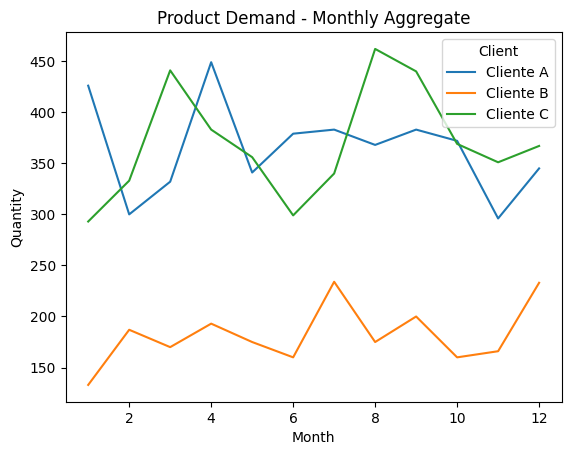

In [20]:
# Visualizar la demanda de productos utilizando seaborn

# Visualizar la demanda de productos por mes utilizando un gráfico de barras

sns.lineplot(data = demand_products , x ='Month', y ='Quantity', hue = 'Client')
plt.title('Product Demand - Monthly Aggregate')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.show()


# Análisis de la relación entre la temperatura y la calidad del producto

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3d8a3cf7-bb98-4fa3-989b-a10c6393cda1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>